# Model Comparison Dashboard

**Purpose:** Comprehensive comparative analysis between Llama and InternVL3 models using modular architecture with professional visualization

## Key Features
- **Auto-Discovery:** Automatically finds latest evaluation JSON files in output directory
- **Manual Override:** Supports custom file path specification for specific comparisons
- **Side-by-Side Analysis:** Professional 2x2 dashboard comparing overall performance metrics
- **Field-Level Heatmaps:** Detailed accuracy comparison across all business document fields
- **Performance Delta:** Visual analysis of relative strengths and weaknesses
- **Executive Reporting:** Generates markdown summaries with deployment recommendations
- **Professional Visualization:** Inline charts with business-grade styling and export capability
- **Dynamic Model Detection:** Automatically detects and displays actual model variants from evaluation data

## Architecture Overview
This notebook leverages the established modular architecture:
- **`common.config`** - Centralized styling constants and output directory configuration
- **`compare_models.ModelComparator`** - Professional visualization and analysis engine
- **Inline Visualization** - All charts display immediately with matplotlib integration
- **Auto-Export** - PNG charts and markdown reports saved to OUTPUT_DIR

## Comparison Capabilities
- **Overall Performance:** Accuracy, document processing stats, quality distribution
- **Field Analysis:** 25 business document fields with accuracy heatmaps and delta analysis
- **Resource Comparison:** Memory usage, processing speed, deployment considerations
- **Deployment Guidance:** Model selection recommendations based on performance data

## Input Requirements
- **Llama Results:** `llama_evaluation_results_*.json` from model evaluation
- **InternVL3 Results:** `internvl3_evaluation_results_*.json` from model evaluation
- **Auto-Discovery:** Searches OUTPUT_DIR for latest timestamped files
- **Manual Specification:** Override with custom file paths if needed

## Model Variants Supported
- **Llama:** Llama-3.2-11B-Vision-Instruct or Llama-3.2-11B-Vision
- **InternVL3:** InternVL3-2B or InternVL3-8B (automatically detected from evaluation data)

In [1]:
# ============================================================================
# IMPORTS AND SETUP
# ============================================================================

import sys
import warnings
from datetime import datetime
from pathlib import Path

# Add parent directory to Python path to import modules
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import visualization libraries
import matplotlib.pyplot as plt

# Import ModelComparator class
from compare_models import ModelComparator, find_latest_results
from IPython.display import Markdown, display

# Import configuration and ModelComparator
from common.config import CHART_DPI, OUTPUT_DIR

# Configure environment
warnings.filterwarnings("ignore")
%matplotlib inline

# Set up matplotlib for high-quality inline display
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = CHART_DPI
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.facecolor"] = "white"

print("📊 Model Comparison Dashboard (Interactive Notebook Version)")
print("✅ All modules imported successfully")
print(f"📁 Output directory: {OUTPUT_DIR}")
print("🎨 Visualization engine initialized")
print("🔧 Ready for model comparison analysis")

📊 Model Comparison Dashboard (Interactive Notebook Version)
✅ All modules imported successfully
📁 Output directory: /home/jovyan/nfs_share/tod/output
🎨 Visualization engine initialized
🔧 Ready for model comparison analysis


In [2]:
# ============================================================================
# CONFIGURATION AND FILE DISCOVERY
# ============================================================================

print("🔍 MODEL EVALUATION FILE DISCOVERY")
print("=" * 50)

# Configuration options - modify these as needed
AUTO_DISCOVER = True  # Set to False to use manual file paths below
MANUAL_LLAMA_PATH = (
    None  # Example: "/path/to/llama_evaluation_results_20240315_143022.json"
)
MANUAL_INTERNVL3_PATH = (
    None  # Example: "/path/to/internvl3_evaluation_results_20240315_143022.json"
)

# Initialize output directory and comparator
output_dir_path = Path(OUTPUT_DIR)
output_dir_path.mkdir(parents=True, exist_ok=True)
comparator = ModelComparator(str(output_dir_path))

print(f"📁 Searching in: {OUTPUT_DIR}")

# File discovery logic
if AUTO_DISCOVER:
    print("🤖 Auto-discovering latest evaluation files...")
    llama_file, internvl3_file = find_latest_results(str(output_dir_path))

    if llama_file and internvl3_file:
        # Display discovered files with metadata
        llama_path = Path(llama_file)
        internvl3_path = Path(internvl3_file)

        llama_mtime = datetime.fromtimestamp(llama_path.stat().st_mtime)
        internvl3_mtime = datetime.fromtimestamp(internvl3_path.stat().st_mtime)

        print("\n✅ DISCOVERED FILES:")
        print(f"🦙 Llama: {llama_path.name}")
        print(f"   📅 Modified: {llama_mtime.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"   📏 Size: {llama_path.stat().st_size / 1024:.1f} KB")

        print(f"🔬 InternVL3: {internvl3_path.name}")
        print(f"   📅 Modified: {internvl3_mtime.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"   📏 Size: {internvl3_path.stat().st_size / 1024:.1f} KB")

    else:
        print("❌ ERROR: Could not auto-discover evaluation files")
        print("💡 Available files in output directory:")
        json_files = list(output_dir_path.glob("*evaluation_results*.json"))
        if json_files:
            for f in sorted(json_files):
                mtime = datetime.fromtimestamp(f.stat().st_mtime)
                print(f"   📄 {f.name} ({mtime.strftime('%Y-%m-%d %H:%M:%S')})")
        else:
            print("   📂 No evaluation JSON files found")
        print("\n💡 Set AUTO_DISCOVER = False and specify manual paths to proceed")

else:
    print("📝 Using manual file paths...")
    llama_file = MANUAL_LLAMA_PATH
    internvl3_file = MANUAL_INTERNVL3_PATH

    if not llama_file or not internvl3_file:
        print("❌ ERROR: Manual paths not specified")
        print("💡 Please set MANUAL_LLAMA_PATH and MANUAL_INTERNVL3_PATH variables")
    else:
        print(f"🦙 Llama: {llama_file}")
        print(f"🔬 InternVL3: {internvl3_file}")

# Validate file existence
files_valid = False
if llama_file and internvl3_file:
    if Path(llama_file).exists() and Path(internvl3_file).exists():
        files_valid = True
        print("\n✅ VALIDATION SUCCESSFUL")
        print("📊 Ready to proceed with model comparison")
    else:
        print("\n❌ VALIDATION FAILED")
        if not Path(llama_file).exists():
            print(f"   🦙 Llama file not found: {llama_file}")
        if not Path(internvl3_file).exists():
            print(f"   🔬 InternVL3 file not found: {internvl3_file}")
else:
    print("\n⚠️ FILE DISCOVERY INCOMPLETE")
    print("📋 Check configuration and file availability")

print("\n📋 CONFIGURATION SUMMARY")
print(f"   Auto-discovery: {'Enabled' if AUTO_DISCOVER else 'Disabled'}")
print(f"   Files ready: {'Yes' if files_valid else 'No'}")
print(f"   Output directory: {output_dir_path}")

🔍 MODEL EVALUATION FILE DISCOVERY
📁 Searching in: /home/jovyan/nfs_share/tod/output
🤖 Auto-discovering latest evaluation files...

✅ DISCOVERED FILES:
🦙 Llama: llama_evaluation_results_20250812_062720.json
   📅 Modified: 2025-08-12 06:27:20
   📏 Size: 1.0 KB
🔬 InternVL3: internvl3_evaluation_results_20250812_061624.json
   📅 Modified: 2025-08-12 06:16:24
   📏 Size: 1.1 KB

✅ VALIDATION SUCCESSFUL
📊 Ready to proceed with model comparison

📋 CONFIGURATION SUMMARY
   Auto-discovery: Enabled
   Files ready: Yes
   Output directory: /home/jovyan/nfs_share/tod/output


In [ ]:
# ============================================================================
# DATA LOADING AND VALIDATION
# ============================================================================

if not files_valid:
    print("⚠️ SKIPPING DATA LOADING - Files not validated")
    print("💡 Please fix file discovery issues in the previous cell")
    llama_data = None
    internvl3_data = None
else:
    print("📊 LOADING EVALUATION RESULTS")
    print("=" * 50)

    # Load evaluation data using ModelComparator
    print("🔄 Loading Llama evaluation data...")
    llama_data = comparator.load_evaluation_results(llama_file)

    print("🔄 Loading InternVL3 evaluation data...")
    internvl3_data = comparator.load_evaluation_results(internvl3_file)

    # Validate loaded data
    if llama_data and internvl3_data:
        print("\n📊 DATA VALIDATION SUMMARY")
        print("=" * 30)

        # Get actual model names from the data
        llama_model_name = llama_data.get("model_name", "Llama-3.2-11B-Vision")
        internvl3_model_name = internvl3_data.get("model_name", "InternVL3")

        # Llama data summary
        llama_acc = llama_data.get("overall_accuracy", 0)
        llama_docs = llama_data.get("total_images", 0)
        llama_fields = len(llama_data.get("field_accuracies", {}))

        print(f"🦙 {llama_model_name.upper()}:")
        print(f"   📊 Overall Accuracy: {llama_acc:.1%}")
        print(f"   📄 Documents Processed: {llama_docs}")
        print(f"   📋 Fields Analyzed: {llama_fields}")
        print(f"   ⭐ Perfect Documents: {llama_data.get('perfect_documents', 0)}")

        # InternVL3 data summary
        internvl3_acc = internvl3_data.get("overall_accuracy", 0)
        internvl3_docs = internvl3_data.get("total_images", 0)
        internvl3_fields = len(internvl3_data.get("field_accuracies", {}))

        print(f"\n🔬 {internvl3_model_name.upper()}:")
        print(f"   📊 Overall Accuracy: {internvl3_acc:.1%}")
        print(f"   📄 Documents Processed: {internvl3_docs}")
        print(f"   📋 Fields Analyzed: {internvl3_fields}")
        print(f"   ⭐ Perfect Documents: {internvl3_data.get('perfect_documents', 0)}")

        # Quick comparison preview
        accuracy_delta = llama_acc - internvl3_acc
        print("\n⚡ QUICK COMPARISON:")
        print(
            f"   📈 Accuracy Delta: {accuracy_delta:+.1%} ({'Llama leads' if accuracy_delta > 0 else 'InternVL3 leads' if accuracy_delta < 0 else 'Tied'})"
        )
        print(
            f"   📊 Field Coverage: {'Consistent' if llama_fields == internvl3_fields else 'Different'}"
        )
        print(
            f"   📷 Document Count: {'Consistent' if llama_docs == internvl3_docs else 'Different'}"
        )

        # Data consistency checks
        issues = []
        if llama_fields != internvl3_fields:
            issues.append(
                f"Field count mismatch ({llama_fields} vs {internvl3_fields})"
            )
        if llama_docs != internvl3_docs:
            issues.append(f"Document count mismatch ({llama_docs} vs {internvl3_docs})")

        if issues:
            print("\n⚠️ DATA CONSISTENCY WARNINGS:")
            for issue in issues:
                print(f"   • {issue}")
            print("   💡 Comparison will proceed but results may be affected")
        else:
            print("\n✅ DATA CONSISTENCY: All validation checks passed")

        print("\n🚀 Ready to generate comparative visualizations!")

    else:
        print("\n❌ DATA LOADING FAILED")
        if not llama_data:
            print("   🦙 Llama data could not be loaded")
        if not internvl3_data:
            print("   🔬 InternVL3 data could not be loaded")
        print("   💡 Check file format and JSON structure")

In [ ]:
# ============================================================================
# SIDE-BY-SIDE COMPARISON DASHBOARD
# ============================================================================

if not (llama_data and internvl3_data):
    print("⚠️ SKIPPING DASHBOARD - Evaluation data not available")
    print("💡 Please resolve data loading issues in the previous cell")
else:
    print("🎨 GENERATING SIDE-BY-SIDE COMPARISON DASHBOARD")
    print("=" * 60)

    # Create comparison dashboard with inline display
    print("📊 Creating 2x2 performance comparison dashboard...")

    try:
        # Get actual model names from the data
        llama_model_name = llama_data.get("model_name", "Llama-3.2-11B-Vision")
        internvl3_model_name = internvl3_data.get("model_name", "InternVL3")

        # Generate dashboard using ModelComparator
        dashboard_path = comparator.create_side_by_side_comparison(
            llama_data, internvl3_data
        )

        # Display the generated dashboard inline
        display(Markdown("## 📊 Model Performance Comparison Dashboard"))
        display(
            Markdown(
                f"**Side-by-side analysis of {llama_model_name} vs {internvl3_model_name} performance metrics**"
            )
        )

        # Show the image inline
        from IPython.display import Image as IPImage

        display(IPImage(dashboard_path, width=1000))

        # Display key insights
        llama_acc = llama_data.get("overall_accuracy", 0)
        internvl3_acc = internvl3_data.get("overall_accuracy", 0)
        accuracy_delta = llama_acc - internvl3_acc

        display(Markdown("### 📈 Key Performance Insights"))

        insights_text = f"""
**Overall Performance:**
- **{llama_model_name}:** {llama_acc:.1%} accuracy
- **{internvl3_model_name}:** {internvl3_acc:.1%} accuracy  
- **Performance Delta:** {accuracy_delta:+.1%}

**Document Quality:**
- **{llama_model_name} Perfect Documents:** {llama_data.get("perfect_documents", 0)}/{llama_data.get("total_images", 0)}
- **{internvl3_model_name} Perfect Documents:** {internvl3_data.get("perfect_documents", 0)}/{internvl3_data.get("total_images", 0)}

**Performance Leader:** {"🦙 Llama leads" if accuracy_delta > 0.01 else "🔬 InternVL3 leads" if accuracy_delta < -0.01 else "🤝 Performance is comparable"}
        """

        display(Markdown(insights_text))

        print("\n✅ Dashboard generated successfully!")
        print(f"💾 Saved to: {Path(dashboard_path).name}")
        print(f"📁 Full path: {dashboard_path}")

    except Exception as e:
        print(f"❌ Error generating dashboard: {e}")
        import traceback

        traceback.print_exc()

🎨 GENERATING FIELD-LEVEL ACCURACY HEATMAP
📊 Creating field-by-field accuracy comparison with delta analysis...
🎨 Creating field accuracy heatmap...
✅ Field accuracy heatmap saved: /home/jovyan/nfs_share/tod/output/field_accuracy_heatmap_20250812_063205.png


## 🎯 Field-Level Performance Analysis

**Detailed accuracy comparison across all business document fields with performance delta visualization**

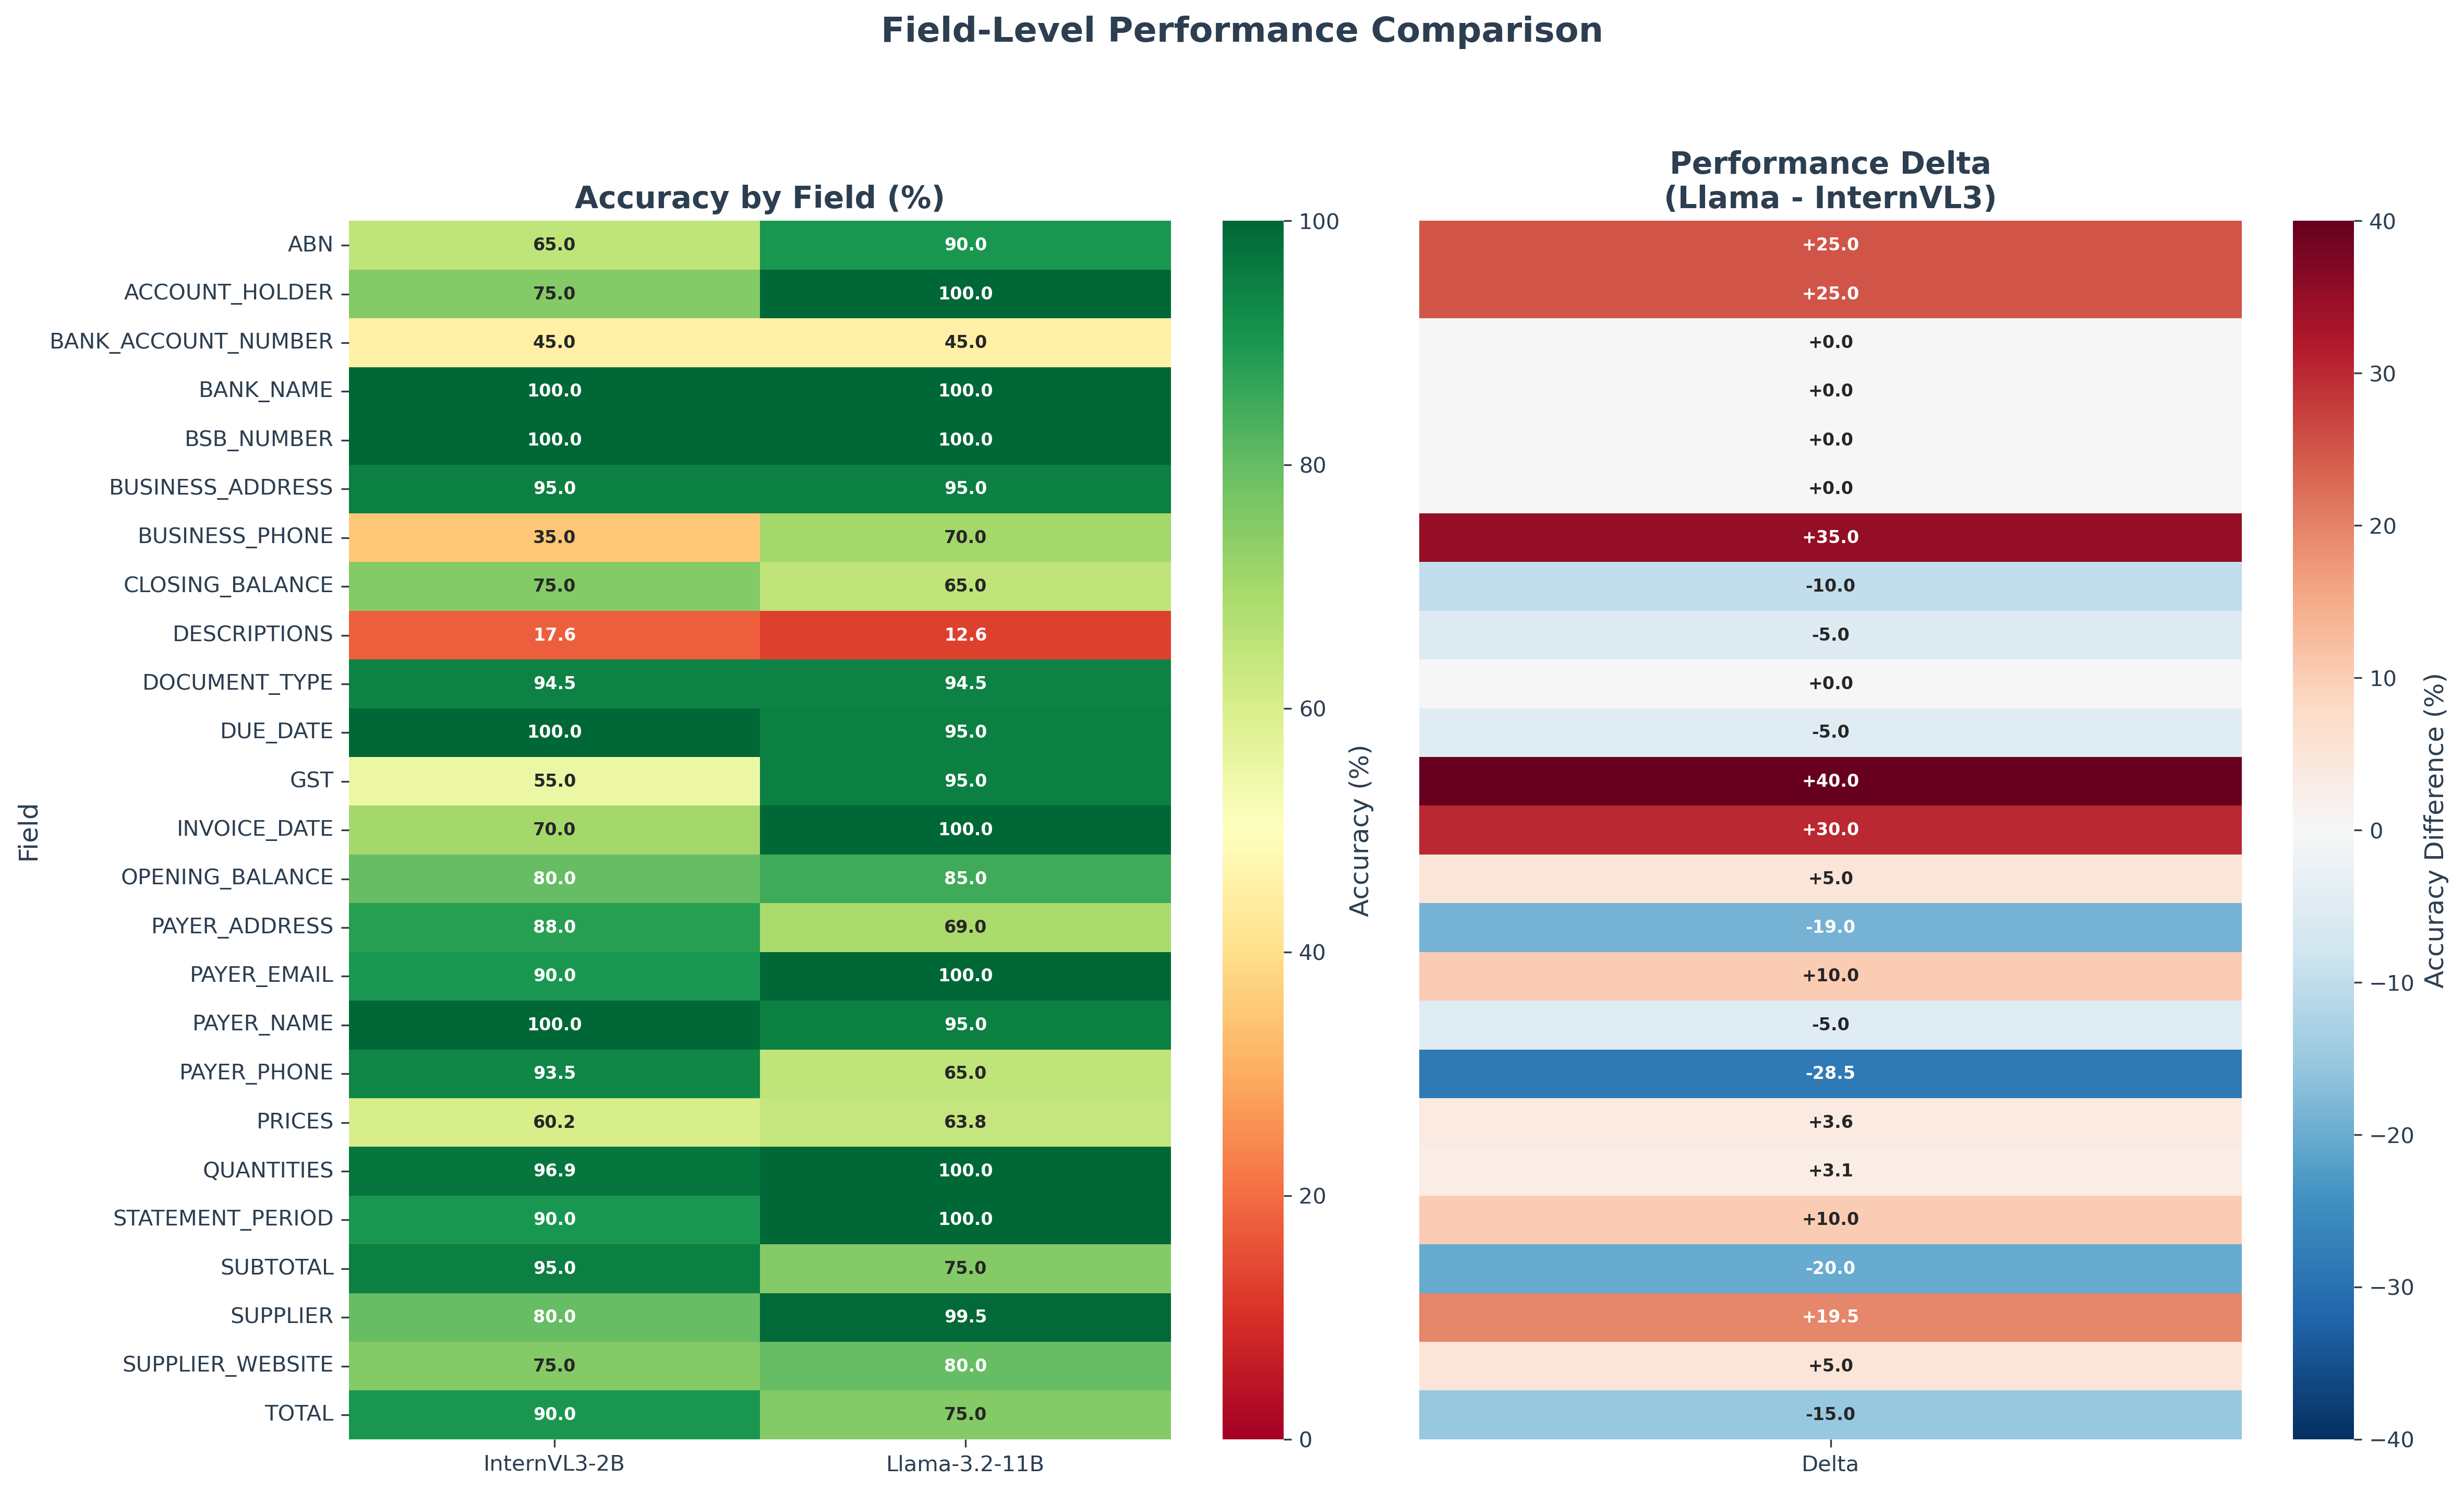

### 📋 Field-Level Performance Summary


**Field Competition Results:**
- **Total Fields Analyzed:** 25
- **Llama Wins:** 12 fields
- **InternVL3 Wins:** 8 fields
- **Ties (≤1% difference):** 5 fields

**Field Dominance:** 🦙 Llama dominates
        

**Largest Performance Differences (>10%):**
- **GST:** Llama leads by 40.0%
- **BUSINESS_PHONE:** Llama leads by 35.0%
- **INVOICE_DATE:** Llama leads by 30.0%
- **PAYER_PHONE:** InternVL3 leads by 28.5%
- **ABN:** Llama leads by 25.0%



✅ Heatmap analysis completed successfully!
💾 Saved to: field_accuracy_heatmap_20250812_063205.png
📁 Full path: /home/jovyan/nfs_share/tod/output/field_accuracy_heatmap_20250812_063205.png


In [5]:
# ============================================================================
# FIELD-LEVEL ACCURACY HEATMAP ANALYSIS
# ============================================================================

if not (llama_data and internvl3_data):
    print("⚠️ SKIPPING HEATMAP ANALYSIS - Evaluation data not available")
    print("💡 Please resolve data loading issues in previous cells")
else:
    print("🎨 GENERATING FIELD-LEVEL ACCURACY HEATMAP")
    print("=" * 55)

    print("📊 Creating field-by-field accuracy comparison with delta analysis...")

    try:
        # Generate heatmap using ModelComparator
        heatmap_path = comparator.create_field_accuracy_heatmap(
            llama_data, internvl3_data
        )

        # Display the heatmap inline
        display(Markdown("## 🎯 Field-Level Performance Analysis"))
        display(
            Markdown(
                "**Detailed accuracy comparison across all business document fields with performance delta visualization**"
            )
        )

        # Show the heatmap image inline
        display(IPImage(heatmap_path, width=1200))

        # Analyze field-level performance
        llama_fields = llama_data.get("field_accuracies", {})
        internvl3_fields = internvl3_data.get("field_accuracies", {})

        # Calculate field performance statistics
        all_fields = sorted(set(llama_fields.keys()) | set(internvl3_fields.keys()))

        llama_wins = 0
        internvl3_wins = 0
        ties = 0
        large_deltas = []

        for field in all_fields:
            l_acc = llama_fields.get(field, 0)
            i_acc = internvl3_fields.get(field, 0)
            delta = l_acc - i_acc

            if abs(delta) < 0.01:  # Within 1%
                ties += 1
            elif delta > 0:
                llama_wins += 1
            else:
                internvl3_wins += 1

            # Track large performance differences
            if abs(delta) > 0.1:  # >10% difference
                large_deltas.append((field, delta))

        # Display field analysis summary
        display(Markdown("### 📋 Field-Level Performance Summary"))

        field_summary = f"""
**Field Competition Results:**
- **Total Fields Analyzed:** {len(all_fields)}
- **Llama Wins:** {llama_wins} fields
- **InternVL3 Wins:** {internvl3_wins} fields
- **Ties (≤1% difference):** {ties} fields

**Field Dominance:** {"🦙 Llama dominates" if llama_wins > internvl3_wins + 3 else "🔬 InternVL3 dominates" if internvl3_wins > llama_wins + 3 else "⚖️ Balanced performance"}
        """

        if large_deltas:
            large_deltas.sort(key=lambda x: abs(x[1]), reverse=True)
            field_summary += "\n\n**Largest Performance Differences (>10%):**\n"
            for field, delta in large_deltas[:5]:  # Show top 5
                leader = "Llama" if delta > 0 else "InternVL3"
                field_summary += f"- **{field}:** {leader} leads by {abs(delta):.1%}\n"

        display(Markdown(field_summary))

        print("\n✅ Heatmap analysis completed successfully!")
        print(f"💾 Saved to: {Path(heatmap_path).name}")
        print(f"📁 Full path: {heatmap_path}")

    except Exception as e:
        print(f"❌ Error generating heatmap: {e}")
        import traceback

        traceback.print_exc()

In [ ]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================

if not (llama_data and internvl3_data):
    print("⚠️ SKIPPING SUMMARY - Evaluation data not available")
    print("💡 Please resolve data loading issues in previous cells")
else:
    print("🎯 COMPARISON ANALYSIS COMPLETE!")
    print("=" * 60)

    # Get actual model names from the data
    llama_model_name = llama_data.get("model_name", "Llama-3.2-11B-Vision")
    internvl3_model_name = internvl3_data.get("model_name", "InternVL3")

    # List all generated files
    generated_files = []
    if "dashboard_path" in locals():
        generated_files.append(("Side-by-side Dashboard", dashboard_path))
    if "heatmap_path" in locals():
        generated_files.append(("Field Accuracy Heatmap", heatmap_path))

    if generated_files:
        print("📁 GENERATED COMPARISON FILES:")
        for file_type, file_path in generated_files:
            if file_path:
                print(f"   📄 {file_type}: {Path(file_path).name}")

    # Final performance summary
    llama_acc = llama_data.get("overall_accuracy", 0)
    internvl3_acc = internvl3_data.get("overall_accuracy", 0)
    accuracy_delta = llama_acc - internvl3_acc

    print("\n📈 FINAL PERFORMANCE COMPARISON:")
    print(f"   🦙 {llama_model_name}: {llama_acc:.1%} accuracy")
    print(f"   🔬 {internvl3_model_name}: {internvl3_acc:.1%} accuracy")
    print(f"   📊 Performance Delta: {accuracy_delta:+.1%}")

    if abs(accuracy_delta) < 0.01:
        print("   🤝 Models show comparable performance")
    elif accuracy_delta > 0:
        print("   🦙 Llama shows better performance")
    else:
        print("   🔬 InternVL3 shows better performance")

    print(f"\n📁 All comparison files saved to: {output_dir_path}")
    print("🎉 Model comparison analysis complete!")